# Histogram equalization
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/histogram_equalization.ipynb)



In [1]:
# # to run in google colab
# import sys
# if 'google.colab' in sys.modules:
#     import subprocess
#     subprocess.call('apt-get install subversion'.split())
#     subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg'.split())



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10,10)


First, read the image as grayscale



Text(0.5, 1.0, 'Original image')

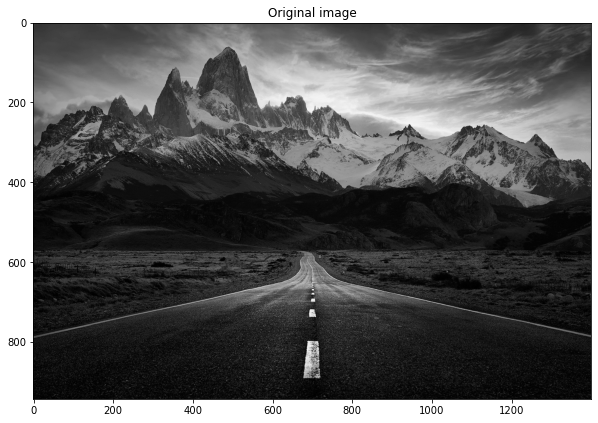

In [3]:
# read as grayscale
# I = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg",0)
I = cv2.imread("landscape.jpg",0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")


Let's start by calculating and showing the original histogram


In [4]:
bins_edges_min_max = [0,256]
num_bins=256
bin_count,bins_edges = np.histogram(I,num_bins,bins_edges_min_max)
bins_start = bins_edges[:-1]


Text(0.5, 1.0, 'Original histogram')

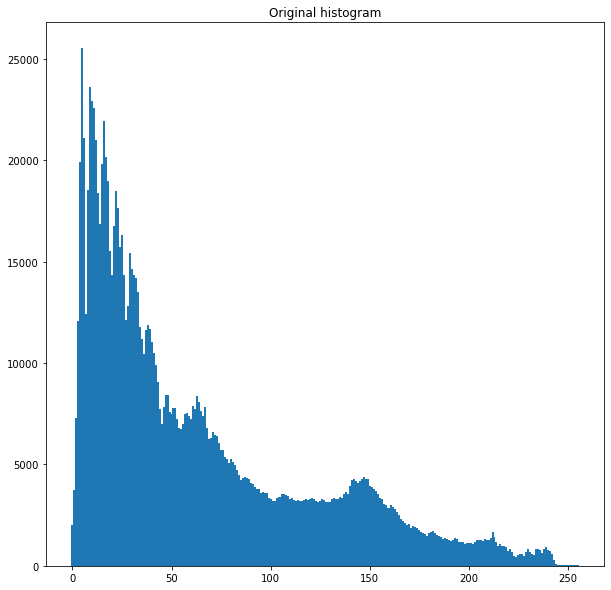

In [5]:
def draw_hist(x_axis,input):
    fig,ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0]/(x_axis[-1]-x_axis[0]+1))
    return fig,ax

draw_hist(bins_start,bin_count)
plt.title("Original histogram")



Normalize the histogram to gat a discrete PDF


Text(0.5, 1.0, 'Original PDF')

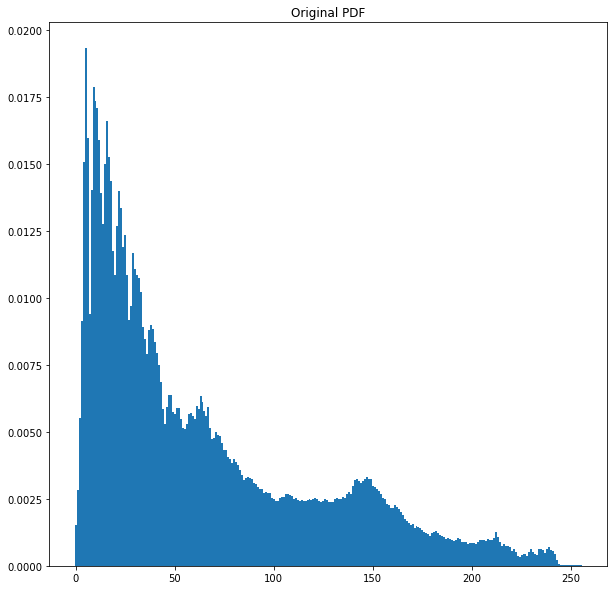

In [6]:
pdf = bin_count/np.sum(bin_count)

draw_hist(bins_start,pdf)
plt.title("Original PDF")



Get the CDF by calculating the cumulative sum of the pdf data


Text(0.5, 1.0, 'Original CDF')

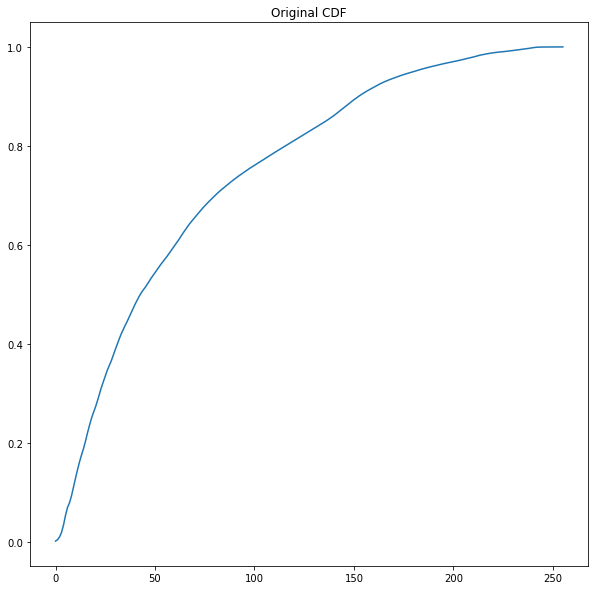

In [7]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")



Text(0.5, 1.0, 'Original PDF+ const*CDF to show the connection between the two')

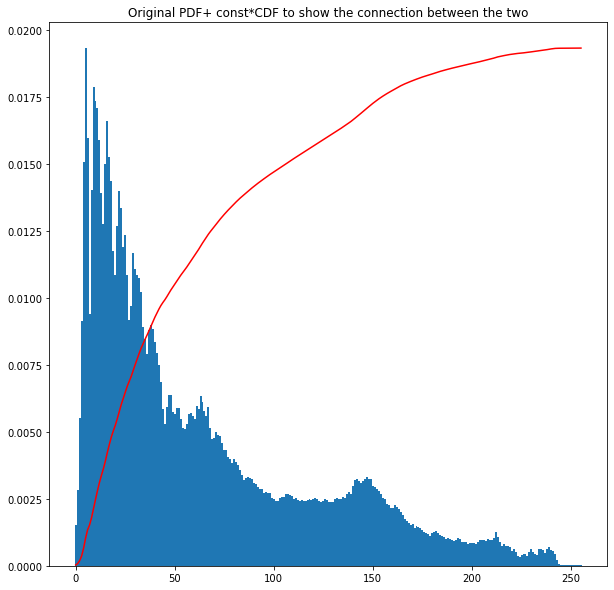

In [8]:
fig,ax = draw_hist(bins_start,pdf)
ax.plot(cdf*np.max(pdf),'r')
plt.title("Original PDF+ const*CDF to show the connection between the two")



The final step is to un-normalize the CDF to become the equalization function


In [9]:
f_eq = np.round(cdf*255).astype(int)

f_eq


array([  0,   1,   3,   5,   9,  14,  18,  20,  24,  28,  33,  37,  41,
        45,  48,  52,  56,  60,  63,  66,  69,  72,  76,  79,  82,  86,
        88,  91,  93,  96,  99, 102, 105, 107, 109, 112, 114, 116, 118,
       120, 122, 125, 126, 128, 130, 131, 133, 134, 136, 137, 139, 140,
       142, 143, 144, 146, 147, 148, 150, 151, 153, 154, 156, 157, 159,
       160, 162, 163, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 184, 185, 186, 187,
       188, 188, 189, 190, 191, 191, 192, 193, 193, 194, 195, 195, 196,
       197, 197, 198, 199, 199, 200, 201, 201, 202, 202, 203, 204, 204,
       205, 206, 206, 207, 207, 208, 209, 209, 210, 211, 211, 212, 212,
       213, 214, 214, 215, 216, 216, 217, 218, 218, 219, 220, 220, 221,
       222, 223, 224, 225, 225, 226, 227, 228, 229, 229, 230, 231, 231,
       232, 233, 233, 234, 234, 235, 235, 236, 236, 237, 237, 238, 238,
       239, 239, 239, 240, 240, 240, 241, 241, 241, 242, 242, 24

Use the equalization function to get the equalized image


Text(0.5, 1.0, 'equalized image')

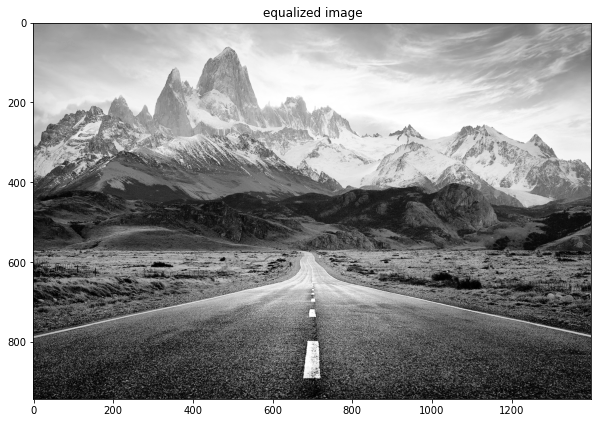

In [10]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap='gray', vmin=0, vmax=255)
plt.title("equalized image")


Plot the equalized histogram, PDF and CDF


Text(0.5, 1.0, 'equalized histogram')

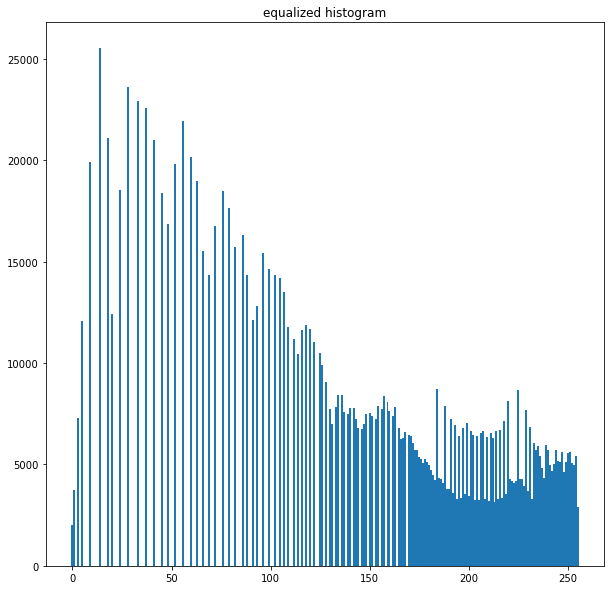

In [11]:
bin_count,bins_edges = np.histogram(I_eq,num_bins,bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start,bin_count)
plt.title("equalized histogram")


Text(0.5, 1.0, 'equalized PDF and const*CDF')

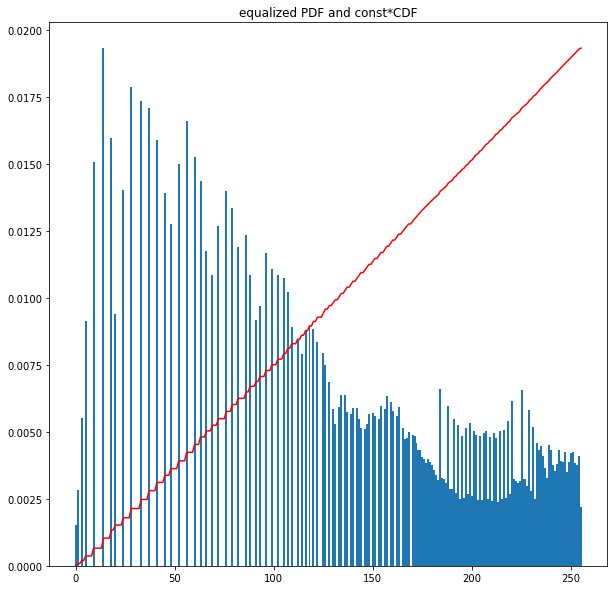

In [12]:
pdf = bin_count/np.sum(bin_count)
cdf = np.cumsum(pdf)

fig,ax = draw_hist(bins_start,pdf)
ax.plot(cdf*np.max(pdf),'r')
plt.title("equalized PDF and const*CDF")


## cv2 histogram equalization function


Text(0.5, 1.0, 'cv2.equalizeHist() result')

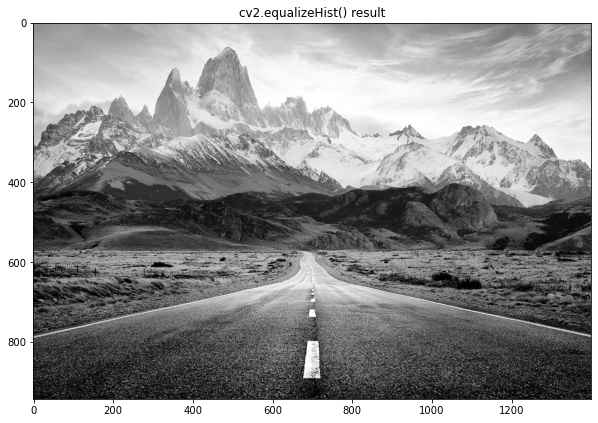

In [13]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap='gray', vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")

